<h1 style="text-align: center;">Data analysis of Justjoint.it</h1>

###### Import bibliotek

In [1]:
import pandas as pd
import numpy as np

###### Ustawienie wyświetlania danych

In [2]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 900)

###### Załadowanie danych, które wczęścniej zostały scrapowane z portalu justjoin.it

In [3]:
file_path = "data/data_just_join_it_all_data_08_2021.csv"
df = pd.read_csv(file_path)

###### Wyświetlenie/sprawdzenie danych, które zostały załadowane

In [5]:
df

,Group,Seniority,Position,Location,Salary_b2b,Salary_permanent,Obligatory_skills,Optional_skills
0,Javascript,Senior,Test Specialist,Warszawa,14 000 - 20 000 PLN,No permanent information,"[{'Python': 'advanced'}, {'MS SQL': 'advanced'...",NaN
1,Javascript,Senior,Senior Full-Stack (React-Ruby) Engineer,Warszawa,21 000 - 25 500 PLN,No permanent information,"[{'TypeScript': 'master'}, {'React': 'master'}...",NaN
2,Javascript,Senior,Senior Vue.js Frontend Developer,Warszawa,22 500 - 27 000 PLN,No permanent information,"[{'Vue.js': 'advanced'}, {'JavaScript': 'advan...","[{'ReactJS': 'nice to have'}, {'Go': 'nice to ..."
3,Javascript,Mid,Front-End Developer,Katowice,8 000 - 14 000 PLN,No permanent information,"[{'English': 'regular'}, {'TypeScript': 'regul...",[{'Node.js': 'nice to have'}]
4,Javascript,Mid,Fullstack .NET Developer + Vue.js,Warszawa,13 600 - 23 200 PLN,No permanent information,"[{'C#': 'advanced'}, {'Vue.js': 'advanced'}, {...",NaN
...,...,...,...,...,...,...,...,...
5501,Other,Junior,Web Publisher,Wrocław,7 000 - 9 000 PLN,No permanent information,"[{'English': 'advanced'}, {'CMS (Content Manag...",[{'Adobe Experiece Manager': 'nice to have'}]
5502,Other,Junior,Blockchain Developer,Kraków,5 000 - 9 000 PLN,5 000 - 9 000 PLN,[{'Blockchain': 'junior'}],"[{'layer 2': 'nice to have'}, {'EVM': 'nice to..."
5503,Other,Junior,Junior ETL Developer,Łódź,Undisclosed Salary,No permanent information,"[{'ETL': 'junior'}, {'Microsoft SQL Server / S...","[{'Banking experience': 'nice to have'}, {'uc4..."
5504,Other,Junior,Junior Specialist in model validation,Łódź,Undisclosed Salary,No permanent information,"[{'SQL': 'regular'}, {'R': 'junior'}, {'Matlab...",NaN


###### Wyświetlenie danych kolumny "Obligatory_skills"

In [11]:
df['Obligatory_skills']

0       [{'Python': 'advanced'}, {'MS SQL': 'advanced'...
1       [{'TypeScript': 'master'}, {'React': 'master'}...
2       [{'Vue.js': 'advanced'}, {'JavaScript': 'advan...
3       [{'English': 'regular'}, {'TypeScript': 'regul...
4       [{'C#': 'advanced'}, {'Vue.js': 'advanced'}, {...
                              ...                        
5501    [{'English': 'advanced'}, {'CMS (Content Manag...
5502                           [{'Blockchain': 'junior'}]
5503    [{'ETL': 'junior'}, {'Microsoft SQL Server / S...
5504    [{'SQL': 'regular'}, {'R': 'junior'}, {'Matlab...
5505                           [{'Blockchain': 'junior'}]
Name: Obligatory_skills, Length: 5506, dtype: object

###### Konwertowanie danych w wierszach do listy oraz zmiana stringów do wersji title

In [12]:
df['Obligatory_skills'] = df['Obligatory_skills'].apply(lambda row: row[1:-1].title().split(','))

###### Wyświetlenie danych kolumny "Obligatory_skills" po konwersji

In [13]:
df['Obligatory_skills']

0       [{'Python': 'Advanced'},  {'Ms Sql': 'Advanced...
1       [{'Typescript': 'Master'},  {'React': 'Master'...
2       [{'Vue.Js': 'Advanced'},  {'Javascript': 'Adva...
3       [{'English': 'Regular'},  {'Typescript': 'Regu...
4       [{'C#': 'Advanced'},  {'Vue.Js': 'Advanced'}, ...
                              ...                        
5501    [{'English': 'Advanced'},  {'Cms (Content Mana...
5502                           [{'Blockchain': 'Junior'}]
5503    [{'Etl': 'Junior'},  {'Microsoft Sql Server / ...
5504    [{'Sql': 'Regular'},  {'R': 'Junior'},  {'Matl...
5505                           [{'Blockchain': 'Junior'}]
Name: Obligatory_skills, Length: 5506, dtype: object

###### Przekształcenie listy danych w kolumnie "Obligatory_skills" na wiersze

In [15]:
df = df.explode('Obligatory_skills')

###### Wyświetlenie danych kolumny "Obligatory_skills" po rozbiciu na wiesze

In [16]:
df['Obligatory_skills']

0                 {'Python': 'Advanced'}
0                 {'Ms Sql': 'Advanced'}
0           {'Azure Devops': 'Advanced'}
1               {'Typescript': 'Master'}
1                    {'React': 'Master'}
                      ...               
5503     {'Business Analysis': 'Junior'}
5504                  {'Sql': 'Regular'}
5504                     {'R': 'Junior'}
5504                {'Matlab': 'Junior'}
5505            {'Blockchain': 'Junior'}
Name: Obligatory_skills, Length: 26322, dtype: object

###### Zmiana pustych miejsc na obiekt “not a number“ z biblioteki numpy

In [17]:
df = df.replace('', np.nan)

###### Usunięcie brakujących danych

In [18]:
df = df.dropna(subset=['Obligatory_skills', 'Optional_skills'])

###### Wyświetlenie danych kolumny "Obligatory_skills" po usunięciu (widac length 9646, poprzednio 26322)

In [20]:
df['Obligatory_skills']

2                                  {'Vue.Js': 'Advanced'}
2                              {'Javascript': 'Advanced'}
2                                      {'Css': 'Regular'}
2                                     {'Html': 'Regular'}
3                                  {'English': 'Regular'}
                              ...                        
5502                             {'Blockchain': 'Junior'}
5503                                    {'Etl': 'Junior'}
5503     {'Microsoft Sql Server / Sql / Relational Dat...
5503                      {'Business Analysis': 'Junior'}
5505                             {'Blockchain': 'Junior'}
Name: Obligatory_skills, Length: 9646, dtype: object

###### Wyodrębnienie technologii z "Obligatory_skills" i przypisanie do nowej kolumny

In [21]:
df['technology_name'] = df['Obligatory_skills'].str.extract(
    "{\'(.*)\':")

###### Wyświetlenie danych kolumny "technology_name"

In [22]:
df['technology_name']

2                                                  Vue.Js
2                                              Javascript
2                                                     Css
2                                                    Html
3                                                 English
                              ...                        
5502                                           Blockchain
5503                                                  Etl
5503    Microsoft Sql Server / Sql / Relational Databases
5503                                    Business Analysis
5505                                           Blockchain
Name: technology_name, Length: 9646, dtype: object

###### Wyświetlenie danych kolumny "Optional_skills"

In [23]:
df['Optional_skills']

2       [{'ReactJS': 'nice to have'}, {'Go': 'nice to ...
2       [{'ReactJS': 'nice to have'}, {'Go': 'nice to ...
2       [{'ReactJS': 'nice to have'}, {'Go': 'nice to ...
2       [{'ReactJS': 'nice to have'}, {'Go': 'nice to ...
3                           [{'Node.js': 'nice to have'}]
                              ...                        
5502    [{'layer 2': 'nice to have'}, {'EVM': 'nice to...
5503    [{'Banking experience': 'nice to have'}, {'uc4...
5503    [{'Banking experience': 'nice to have'}, {'uc4...
5503    [{'Banking experience': 'nice to have'}, {'uc4...
5505    [{'layer 2': 'nice to have'}, {'EVM': 'nice to...
Name: Optional_skills, Length: 9646, dtype: object

###### Konwertowanie danych w wierszach do listy oraz zmiana stringów do wersji title

In [24]:
df['Optional_skills'] = df['Optional_skills'].apply(lambda row: row[1:-1].title().split(','))

###### Przekształcenie listy danych w kolumnie "Optional_skills" na wiersze

In [25]:
df = df.explode('Optional_skills')

###### Wyświetlenie danych kolumny "Optional_skills"

In [26]:
df['Optional_skills']

2            {'Reactjs': 'Nice To Have'}
2                 {'Go': 'Nice To Have'}
2              {'Agile': 'Nice To Have'}
2        {'Open Source': 'Nice To Have'}
2            {'Reactjs': 'Nice To Have'}
                      ...               
5503           {'Maven': 'Nice To Have'}
5503            {'Jira': 'Nice To Have'}
5505         {'Layer 2': 'Nice To Have'}
5505             {'Evm': 'Nice To Have'}
5505        {'Solidity': 'Nice To Have'}
Name: Optional_skills, Length: 21107, dtype: object

###### Wyodrębnienie technologii z "Optional_skills" i przypisanie do nowej kolumny

In [27]:
df['technology_optional_name'] = df['Optional_skills'].str.extract(
    "{\'(.*)\':")

###### Wyświetlenie danych kolumny "technology_optional_name"

In [29]:
df['technology_optional_name']

2           Reactjs
2                Go
2             Agile
2       Open Source
2           Reactjs
           ...     
5503          Maven
5503           Jira
5505        Layer 2
5505            Evm
5505       Solidity
Name: technology_optional_name, Length: 21107, dtype: object

###### Sortowanie kolumny "technology_name" i agregacja danych do za pomocą funkcji "Count", "Size" i "Nunique"

In [30]:
df['technology_name'].sort_values().agg(['count', 'size', 'nunique'])

count      21097
size       21107
nunique     1210
Name: technology_name, dtype: int64

###### Agregacja kolumny "technology_name" za pomocą funkcji "Count", "Size" i "Nunique". Wyświetlenie danych w kolumnowej. 

In [31]:
df.groupby('technology_name').agg(['count', 'size', 'nunique']).stack()

Group  Seniority  Position  Location  Salary_b2b  Salary_permanent  Obligatory_skills  Optional_skills  technology_optional_name
technology_name                                                                                                                                           
.Net             count      156        156       156       156         156               156                156              156                       156
                 size       156        156       156       156         156               156                156              156                       156
                 nunique      8          3        42        15          37                 6                  7               89                        74
.Net 4.5         count        2          2         2         2           2                 2                  2                2                         2
                 size         2          2         2         2           2                 2                  2                2                         2
...                         ...        ...       ...       ...         ...               ...                ...              ...                       ...
• Symfony        size         5          5         5         5           5                 5                  5                5                         5
                 nunique      1          1         1         1           1                 1                  1                5                         5
• Zend Framework count        5          5         5         5           5                 5                  5                5                         5
                 size         5          5         5         5           5                 5                  5                5                         5
                 nunique      1          1         1         1           1                 1                  1                5                         5

[3630 rows x 9 columns]

###### Tworzenie ramki danych po zgrupowaniu kolumny 'technology_name' i policzeniu wystąpień danych nazw

In [33]:
df_obligatory_skills = df.groupby('technology_name').count().reset_index().sort_values('Obligatory_skills',ascending=False).reset_index()[['technology_name', 'Obligatory_skills']]

###### Wyświetlenie 15 wierszy z największa wartością

In [34]:
df_obligatory_skills.head(15)

,technology_name,Obligatory_skills
0,Git,903
1,Javascript,886
2,Sql,749
3,English,654
4,Java,640
5,Python,544
6,Docker,457
7,Linux,388
8,Typescript,375
9,Php,342


###### Stworzenie wykresu słupkowego dla 20 technologii najbardziej poszukiwanych oraz wyświetlenie wartości wystąpień

<AxesSubplot:title={'center':'Most wanded obligatory skills'}, xlabel='technology_name'>

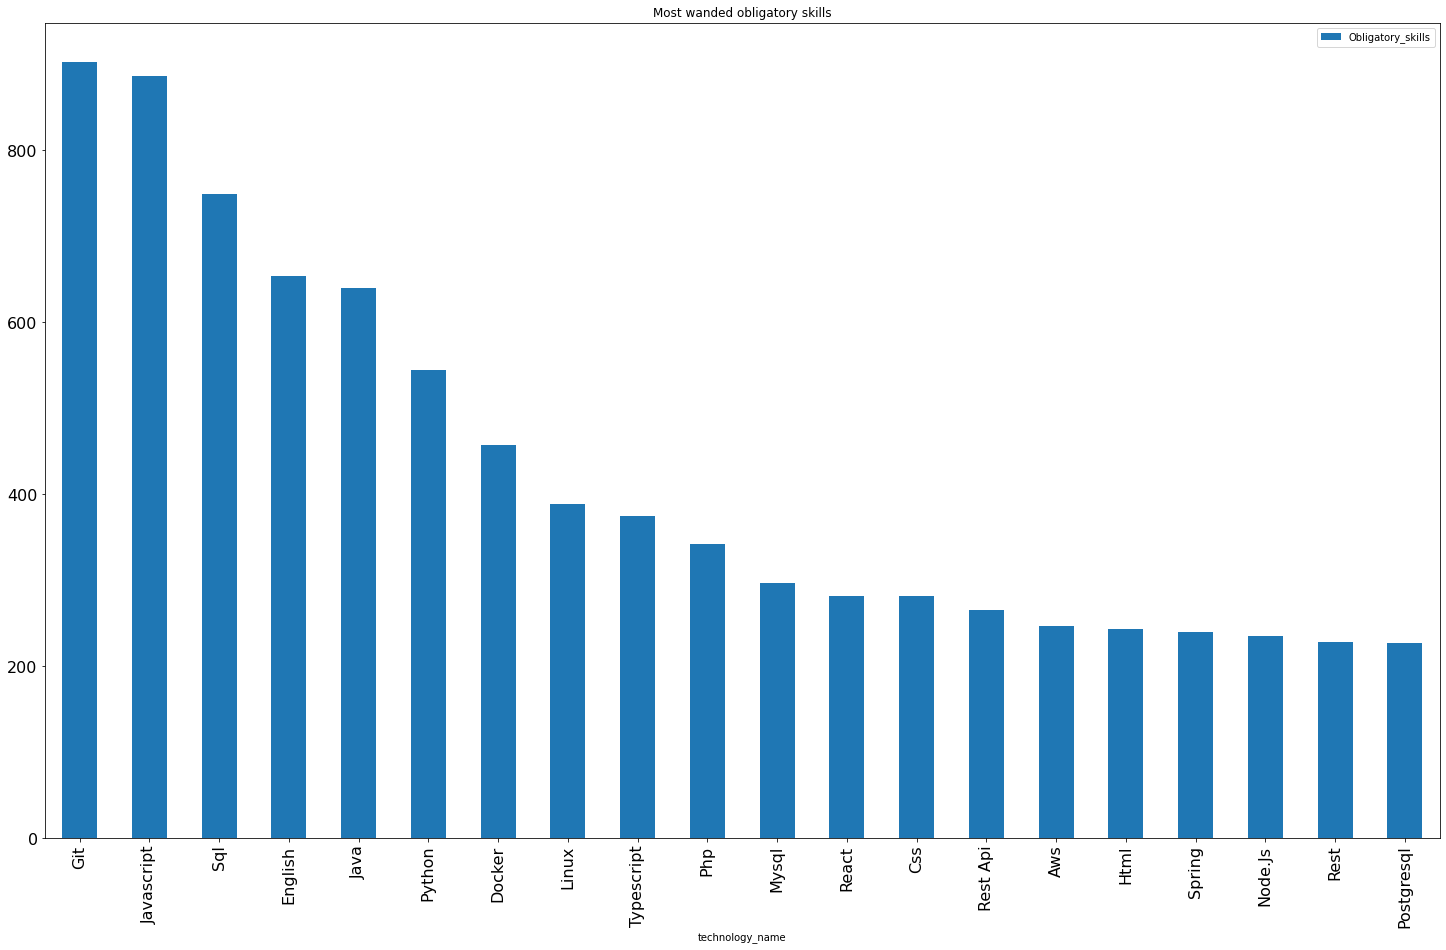

In [36]:
df_obligatory_skills.head(20).plot(x='technology_name', y='Obligatory_skills', kind='bar', fontsize=16, figsize=(25,15), title='Most wanded obligatory skills')

###### Tworzenie ramki danych po zgrupowaniu kolumny 'technology_optional_name' i policzeniu wystąpień danych nazw

In [37]:
df_optional_skills = df.groupby('technology_optional_name').count().reset_index().sort_values('Optional_skills',ascending=False).reset_index()[['technology_optional_name', 'Optional_skills']]

###### Wyświetlenie 10 wierszy z nawieksza wartością

In [39]:
df_optional_skills.head(10)

,technology_optional_name,Optional_skills
0,Aws,756
1,Docker,728
2,Kubernetes,474
3,Python,451
4,Javascript,393
5,React,376
6,Java,367
7,Node.Js,351
8,Azure,327
9,Angular,324


###### Stworzenie wykresu słupkowego dla 20 opcjonalnych technologii najbardziej poszukiwanych oraz wyświetlenie wartosici wystąpień

<AxesSubplot:title={'center':'Most wanded optional skills'}, xlabel='technology_optional_name'>

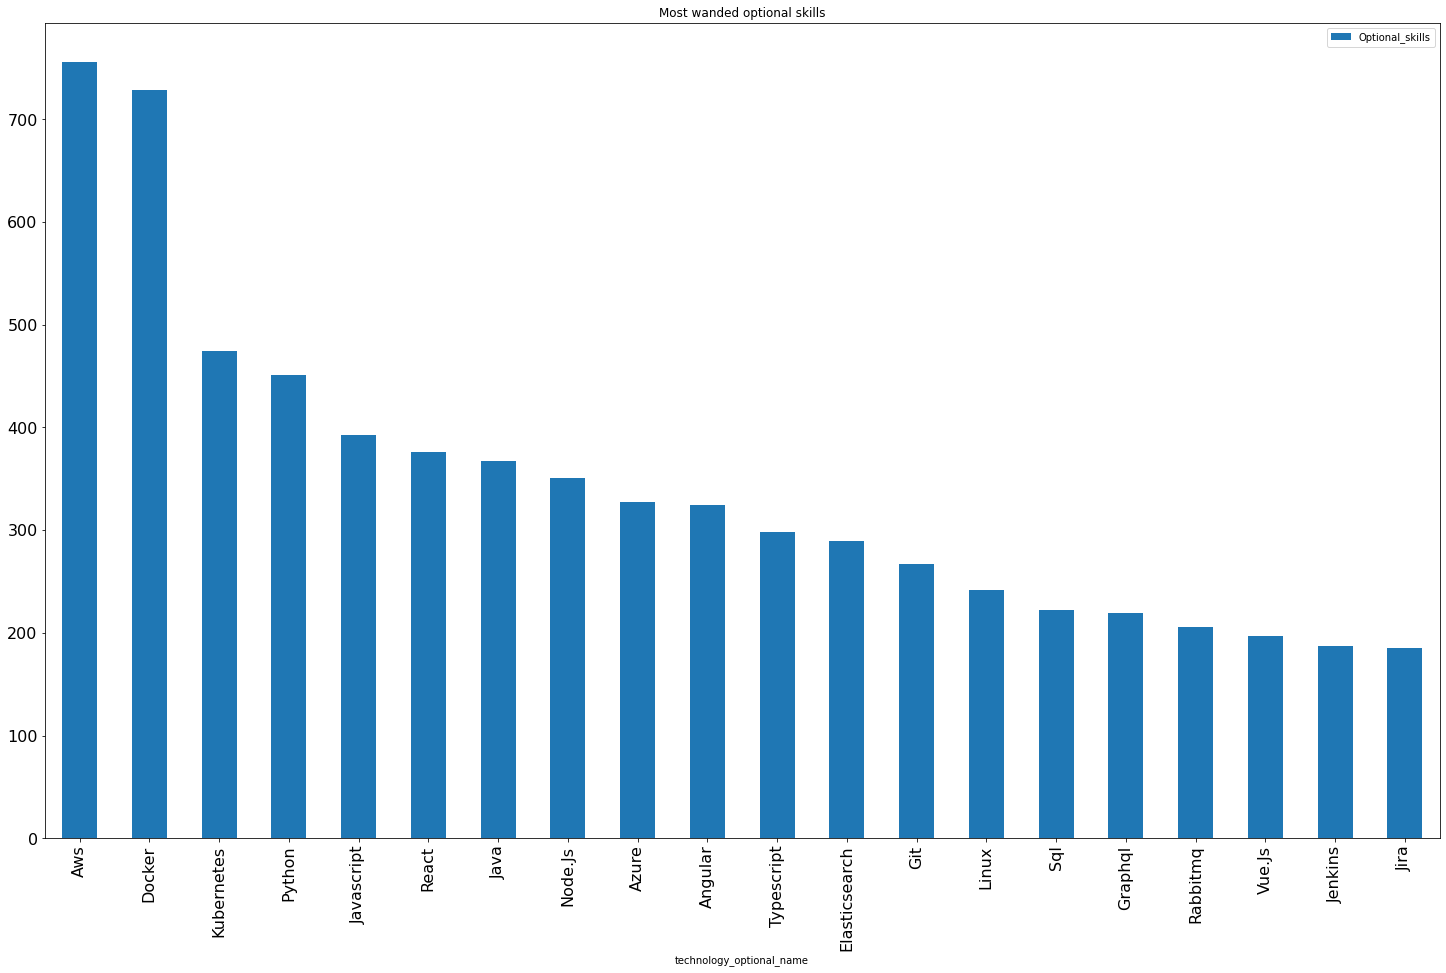

In [40]:
df_optional_skills.head(20).plot(x='technology_optional_name', y='Optional_skills', kind='bar', fontsize=16, figsize=(25,15), title='Most wanded optional skills')

###### Wyświetlenie danych kolumny "Group"

In [41]:
df['Group']

2       Javascript
2       Javascript
2       Javascript
2       Javascript
2       Javascript
           ...    
5503         Other
5503         Other
5505         Other
5505         Other
5505         Other
Name: Group, Length: 21107, dtype: object

###### Tworzenie ramki danych po zgrupowaniu kolumny 'Group' i policzeniu wystapień danych nazw

In [42]:
df_technology_group = df.groupby('Group').count().sort_values('Seniority',ascending=False)

###### Wyświetlenie danych nowej ramki

In [44]:
df_technology_group

,Seniority,Position,Location,Salary_b2b,Salary_permanent,Obligatory_skills,Optional_skills,technology_name,technology_optional_name
Group,,,,,,,,,
Javascript,4011,4011,4011,4011,4011,4011,4011,4011,4011
Java,3176,3176,3176,3176,3176,3176,3176,3176,3176
Php,2292,2292,2292,2292,2292,2292,2292,2284,2268
Testing,1516,1516,1516,1516,1516,1516,1516,1516,1516
Python,1506,1506,1506,1506,1506,1506,1506,1506,1410
Net,1361,1361,1361,1361,1361,1361,1361,1361,1357
Devops,1082,1082,1082,1082,1082,1082,1082,1082,1082
Data,1050,1050,1050,1050,1050,1050,1050,1050,1050
Mobile,809,809,809,809,809,809,809,809,809


###### Policzenie wszystkich grup technologicznych

In [45]:
len(df_technology_group)

24

###### Stworzenie wykresu kołowego dla grup technologicznych oraz wyświetlenie wartosici procentowych udziału wszytskich ogłoszeń

<AxesSubplot:title={'center':'Technology Group'}, ylabel='Seniority'>

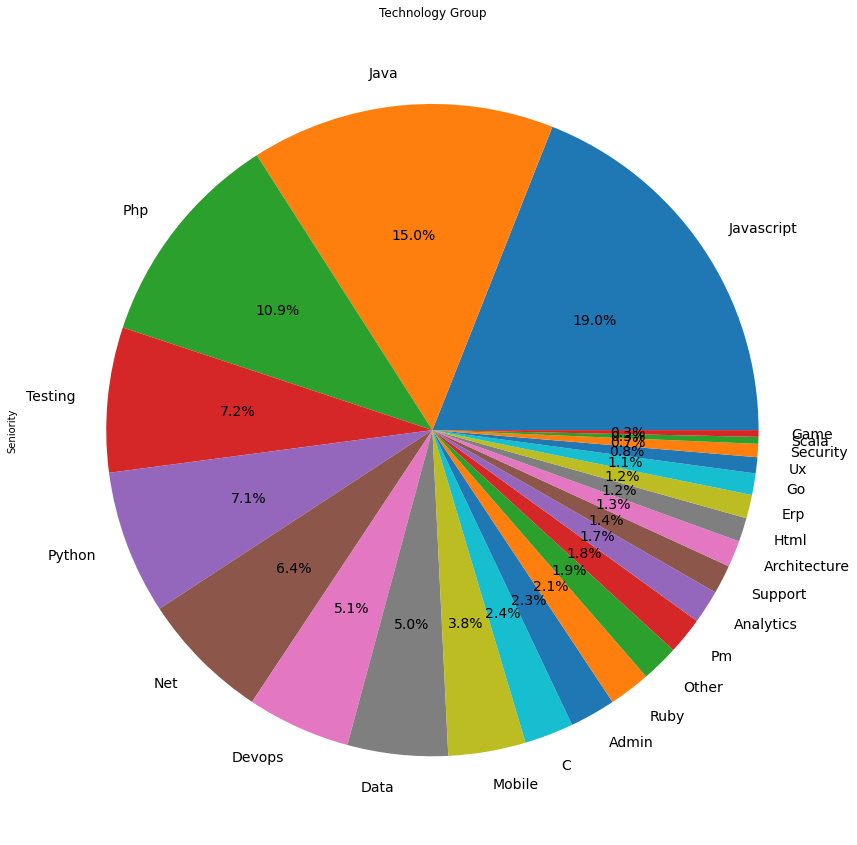

In [46]:
df_technology_group.plot(x='Group', y='Seniority', kind='pie', fontsize=14, figsize=(25,15), title='Technology Group', legend=False, autopct='%1.1f%%')

###### Wyświetlenie danych kolumny "Seniority"

In [47]:
df['Seniority']

2       Senior
2       Senior
2       Senior
2       Senior
2       Senior
         ...  
5503    Junior
5503    Junior
5505    Junior
5505    Junior
5505    Junior
Name: Seniority, Length: 21107, dtype: object

###### Tworzenie ramki danych po zgrupowaniu kolumny 'Seniority' i policzeniu wystąpień danych nazw

In [48]:
df_seniority = df.groupby('Seniority').count().sort_values('Position',ascending=False).reset_index()[['Seniority', 'Position']]

###### Wyświetlenie danych nowej ramki

In [49]:
df_seniority

,Seniority,Position
0,Mid,11568
1,Senior,6794
2,Junior,2745


###### Stworzenie wykresu kołowego dla poziomu zaawansowania oraz wyświetlenie wartości procentowych udziału wszytskich ogłoszeń

<AxesSubplot:title={'center':'Seniority'}, ylabel='Position'>

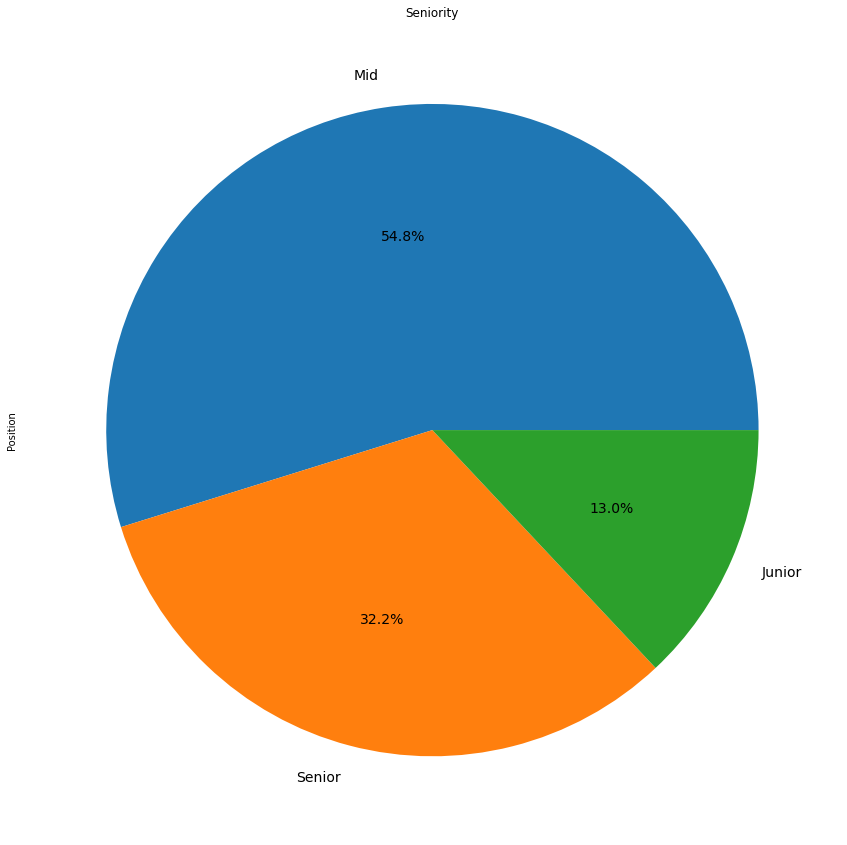

In [50]:
df_seniority.plot(x='Seniority', y='Position', kind='pie', fontsize=14, figsize=(25,15), title='Seniority', legend=False, labels=df_seniority['Seniority'].to_list(), autopct='%1.1f%%')